In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import accuracy_score

In [5]:
TRAIN_DATA_PATH = 'NFT_G_dataset-PTC_training.csv'
TEST_DATA_PATH = 'NFT_G_dataset-PTC_test.csv'
TARGET_NAME = 'Diameter of Bulb(mm)'

# Load the data
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
#train_data
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [17]:
# Normalize the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns)
    return x_train_scaled, x_test_scaled

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.1

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train_scaled.values,y_train_scaled,epochs=100, batch_size=32,validation_split=0.2)



Epoch 1/100
2/2 [==============================] - 1s 137ms/step - loss: 674004.6875 - mean_squared_error: 751774.4375 - val_loss: 68.9445 - val_mean_squared_error: 68.9445
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 28.7917 - mean_squared_error: 26.1313 - val_loss: 9.1816 - val_mean_squared_error: 9.1816
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.9174 - mean_squared_error: 0.9631 - val_loss: 8.3165 - val_mean_squared_error: 8.3165
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6056 - mean_squared_error: 0.5800 - val_loss: 11.1538 - val_mean_squared_error: 11.1538
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 0.3770 - mean_squared_error: 0.3613 - val_loss: 4.0025 - val_mean_squared_error: 4.0025
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1888 - mean_squared_error: 0.1946 - val_loss: 5.1369 - val_mean_squared_error: 5.1369
Epoch 7/100
2/2 [======

Epoch 52/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6083 - mean_squared_error: 0.5989 - val_loss: 2.9000 - val_mean_squared_error: 2.9000
Epoch 53/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6571 - mean_squared_error: 0.6503 - val_loss: 2.9035 - val_mean_squared_error: 2.9035
Epoch 54/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6829 - mean_squared_error: 0.6750 - val_loss: 2.9070 - val_mean_squared_error: 2.9070
Epoch 55/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6056 - mean_squared_error: 0.5967 - val_loss: 2.9104 - val_mean_squared_error: 2.9104
Epoch 56/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5588 - mean_squared_error: 0.5623 - val_loss: 2.9139 - val_mean_squared_error: 2.9139
Epoch 57/100
2/2 [==============================] - 0s 26ms/step - loss: 0.5951 - mean_squared_error: 0.5864 - val_loss: 2.9173 - val_mean_squared_error: 2.9173
Epoch 58/100
2/2 [================

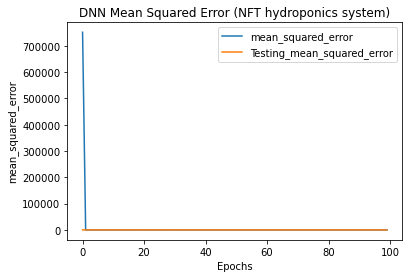

In [18]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('DNN Mean Squared Error (NFT hydroponics system)')
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'Testing_' + key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_error')